In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_fingerprint_match(img1_path, img2_path, visualize=True):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    if img1 is None or img2 is None:
        raise ValueError("One or both image paths are invalid or not found.")

    sift = cv2.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    if des1 is None or des2 is None:
        raise ValueError("Could not compute descriptors on one or both images.")

    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]

    if visualize:
        match_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
        plt.figure(figsize=(12, 6))
        plt.imshow(match_img)
        plt.title(f'Matched Features ({len(good_matches)} good matches)')
        plt.axis('off')
        plt.show()

    score = len(good_matches) / min(len(kp1), len(kp2)) * 100
    print(f"🔍 Match Score: {score:.2f}%")

    return score

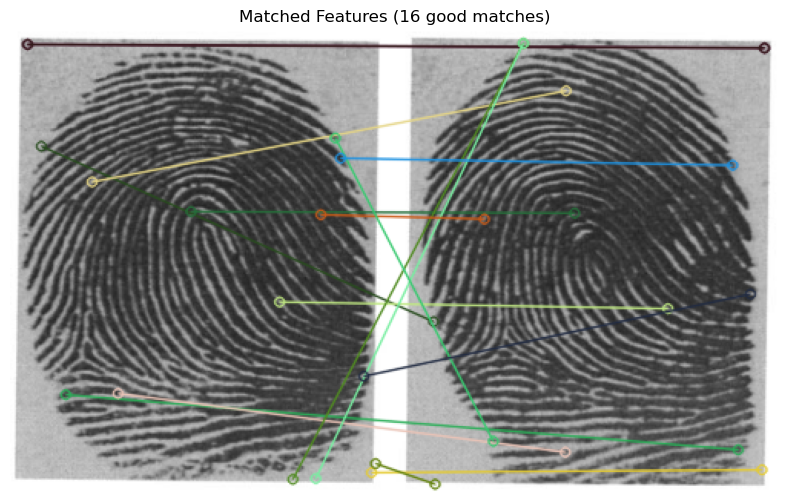

🔍 Match Score: 0.96%


In [3]:
img_path1 = "fingerprint1.png"
img_path2 = "fingerprint2.png"

score = compute_fingerprint_match(img_path1, img_path2, visualize=True)

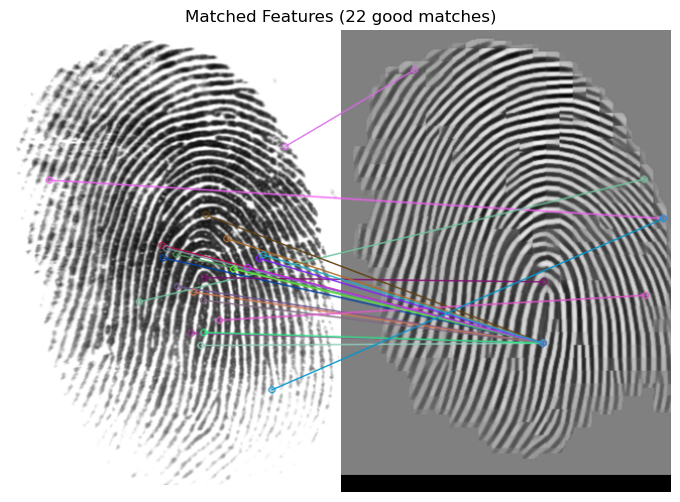

🔍 Match Score: 11.89%


In [4]:
img_path1 = "fingerprint3.png"
img_path2 = "fingerprint4.png"

score = compute_fingerprint_match(img_path1, img_path2, visualize=True)